<a href="https://colab.research.google.com/github/theunknownadorable/Internship-on-ML-AI/blob/main/Day_3/Day_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/beers.csv')
data

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [ ]:
data.isna().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [ ]:
data.columns


Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [ ]:
data.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [ ]:
miss_cols=data[['abv']]

In [ ]:
miss_cols

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075
...,...
2405,0.067
2406,0.052
2407,0.055
2408,0.055


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer = imputer.fit(miss_cols)
miss_cols = imputer.transform(miss_cols)

In [ ]:
miss_cols = pd.DataFrame(miss_cols,columns=[['abv']])

In [ ]:
miss_cols.isna().sum()

abv    0
dtype: int64

In [ ]:
data.drop(['abv'],axis=1,inplace=True)

In [ ]:
data.head()

,ibu,id,name,style,brewery_id,ounces
0,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,NaN,2262,Sex and Candy,American IPA,177,12.0


In [ ]:
data=pd.concat([data,miss_cols],axis=1)

In [ ]:
data

,ibu,id,name,style,brewery_id,ounces,"(abv,)"
0,NaN,1436,Pub Beer,American Pale Lager,408,12.0,0.050
1,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,0.066
2,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,0.071
3,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,0.090
4,NaN,2262,Sex and Candy,American IPA,177,12.0,0.075
...,...,...,...,...,...,...,...
2405,45.0,928,Belgorado,Belgian IPA,424,12.0,0.067
2406,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,0.052
2407,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,0.055
2408,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,0.055


In [ ]:
data.isna().sum()

ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
(abv,)           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ibu         1405 non-null   float64
 1   id          2410 non-null   int64  
 2   name        2410 non-null   object 
 3   style       2405 non-null   object 
 4   brewery_id  2410 non-null   int64  
 5   ounces      2410 non-null   float64
 6   (abv,)      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [ ]:
data['ibu']=data['ibu'].fillna(data['ibu'].median())

In [ ]:
data.isna().sum()

ibu           0
id            0
name          0
style         5
brewery_id    0
ounces        0
(abv,)        0
dtype: int64

In [ ]:
data

,ibu,id,name,style,brewery_id,ounces,"(abv,)"
0,35.0,1436,Pub Beer,American Pale Lager,408,12.0,0.050
1,35.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0,0.066
2,35.0,2264,Rise of the Phoenix,American IPA,177,12.0,0.071
3,35.0,2263,Sinister,American Double / Imperial IPA,177,12.0,0.090
4,35.0,2262,Sex and Candy,American IPA,177,12.0,0.075
...,...,...,...,...,...,...,...
2405,45.0,928,Belgorado,Belgian IPA,424,12.0,0.067
2406,35.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,0.052
2407,35.0,620,B3K Black Lager,Schwarzbier,424,12.0,0.055
2408,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,0.055


In [ ]:
data.groupby('style')['brewery_id'].mean()

style
Abbey Single Ale               57.000000
Altbier                       220.000000
American Adjunct Lager        163.000000
American Amber / Red Ale      248.045113
American Amber / Red Lager    305.965517
                                 ...    
Tripel                        155.454545
Vienna Lager                  296.250000
Wheat Ale                       3.000000
Winter Warmer                 221.733333
Witbier                       257.490196
Name: brewery_id, Length: 99, dtype: float64

In [ ]:
data.name.nunique()

2305

In [ ]:
data.shape

(2410, 7)

In [ ]:
data

,ibu,id,name,style,brewery_id,ounces,"(abv,)"
0,35.0,1436,Pub Beer,American Pale Lager,408,12.0,0.050
1,35.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0,0.066
2,35.0,2264,Rise of the Phoenix,American IPA,177,12.0,0.071
3,35.0,2263,Sinister,American Double / Imperial IPA,177,12.0,0.090
4,35.0,2262,Sex and Candy,American IPA,177,12.0,0.075
...,...,...,...,...,...,...,...
2405,45.0,928,Belgorado,Belgian IPA,424,12.0,0.067
2406,35.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,0.052
2407,35.0,620,B3K Black Lager,Schwarzbier,424,12.0,0.055
2408,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,0.055


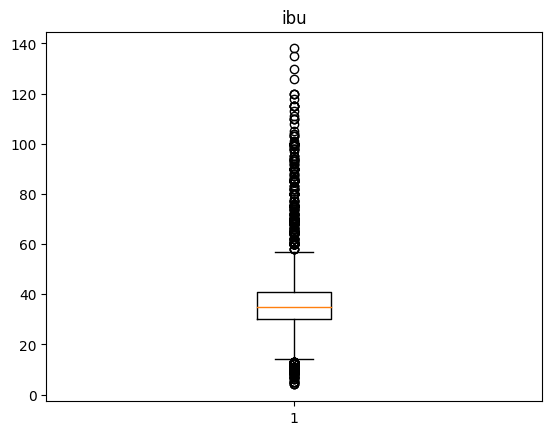

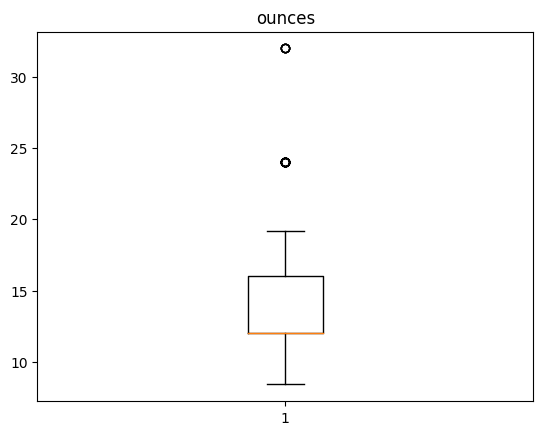

In [ ]:
for i in['ibu','ounces']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1=np.percentile(data['ibu'],25,interpolation='midpoint')
Q2=np.percentile(data['ibu'],50,interpolation='midpoint')
Q3=np.percentile(data['ibu'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

30.0
35.0
41.0


<ipython-input-35-5301ab6856da>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ibu'],25,interpolation='midpoint')
<ipython-input-35-5301ab6856da>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ibu'],50,interpolation='midpoint')
<ipython-input-35-5301ab6856da>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['ibu

In [ ]:
IQR=Q3-Q1
IQR

11.0

In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(low_lim)
print(up_lim)

13.5
57.5


In [ ]:
outlier=[]
for x in data['ibu']:
  if ((x>up_lim)or(x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[60.0,
 92.0,
 70.0,
 70.0,
 70.0,
 94.0,
 65.0,
 65.0,
 82.0,
 11.0,
 65.0,
 75.0,
 82.0,
 13.0,
 68.0,
 68.0,
 80.0,
 13.0,
 68.0,
 65.0,
 103.0,
 13.0,
 4.0,
 80.0,
 13.0,
 4.0,
 13.0,
 6.0,
 80.0,
 4.0,
 75.0,
 10.0,
 69.0,
 67.0,
 138.0,
 115.0,
 12.0,
 8.0,
 62.0,
 12.0,
 10.0,
 69.0,
 5.0,
 70.0,
 75.0,
 70.0,
 60.0,
 60.0,
 62.0,
 70.0,
 69.0,
 108.0,
 10.0,
 85.0,
 87.0,
 68.0,
 104.0,
 85.0,
 60.0,
 65.0,
 60.0,
 65.0,
 81.0,
 85.0,
 76.0,
 75.0,
 8.0,
 83.0,
 80.0,
 60.0,
 60.0,
 72.0,
 94.0,
 72.0,
 8.0,
 7.0,
 80.0,
 80.0,
 9.0,
 68.0,
 60.0,
 64.0,
 85.0,
 118.0,
 115.0,
 86.0,
 100.0,
 100.0,
 94.0,
 94.0,
 94.0,
 130.0,
 64.0,
 10.0,
 80.0,
 70.0,
 100.0,
 9.0,
 80.0,
 90.0,
 70.0,
 85.0,
 99.0,
 77.0,
 65.0,
 8.0,
 69.0,
 58.0,
 10.0,
 126.0,
 65.0,
 65.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 70.0,
 70.0,
 65.0,
 75.0,
 70.0,
 60.0,
 75.0,
 13.0,
 11.0,
 75.0,
 75.0,
 71.0,
 65.0,
 11.0,
 115.0,
 80.0,
 100.0,
 70.0,
 71.0,
 76.0,
 12.0,
 85.0,
 85.0,
 12.0,
 72.0,
 100

In [ ]:
ind1=data['ibu']<low_lim
data.loc[ind1].index

Int64Index([ 136,  151,  153,  155,  164,  171,  213,  278,  355,  362,  378,
             530,  549,  586,  592,  632,  635,  682,  716,  725,  739,  855,
             871,  873,  905,  940,  961,  968,  991, 1027, 1064, 1103, 1161,
            1166, 1177, 1180, 1185, 1195, 1196, 1216, 1221, 1223, 1247, 1253,
            1296, 1307, 1325, 1332, 1346, 1418, 1420, 1436, 1438, 1460, 1508,
            1621, 1627, 1640, 1682, 1817, 1860, 1872, 1908, 1934, 1988, 1994,
            1995, 1997, 1998, 2000, 2001, 2002, 2005, 2006, 2007, 2009, 2012,
            2015, 2025, 2026, 2027, 2086, 2109, 2138, 2173, 2188, 2251, 2272,
            2327, 2339, 2366],
           dtype='int64')

In [ ]:
ind2=data['ibu']>up_lim
data.loc[ind2].index

Int64Index([1788, 1795, 1801, 1806, 1807, 1811, 1828, 1831, 1837, 1840, 1845,
            1851, 1861, 1863, 1864, 1865, 1869, 1870, 1874, 1875, 1880, 1883,
            1891, 1892, 1894, 1898, 1904, 1906, 1911, 1920, 1923, 1924, 1931,
            1936, 1937, 1944, 1945, 1946, 1948, 1950, 1953, 1957, 1958, 1959,
            1962, 1990, 1993, 1999, 2023, 2031, 2040, 2041, 2042, 2043, 2047,
            2049, 2055, 2062, 2064, 2066, 2074, 2075, 2076, 2081, 2084, 2095,
            2108, 2110, 2117, 2120, 2124, 2139, 2144, 2145, 2147, 2160, 2176,
            2179, 2189, 2191, 2197, 2203, 2207, 2214, 2217, 2219, 2221, 2226,
            2228, 2232, 2235, 2243, 2254, 2257, 2261, 2271, 2286, 2297],
           dtype='int64')

In [ ]:
data.drop([1788, 1795, 1801, 1806, 1807, 1811, 1828, 1831, 1837, 1840, 1845,
            1851, 1861, 1863, 1864, 1865, 1869, 1870, 1874, 1875, 1880, 1883,
            1891, 1892, 1894, 1898, 1904, 1906, 1911, 1920, 1923, 1924, 1931,
            1936, 1937, 1944, 1945, 1946, 1948, 1950, 1953, 1957, 1958, 1959,
            1962, 1990, 1993, 1999, 2023, 2031, 2040, 2041, 2042, 2043, 2047,
            2049, 2055, 2062, 2064, 2066, 2074, 2075, 2076, 2081, 2084, 2095,
            2108, 2110, 2117, 2120, 2124, 2139, 2144, 2145, 2147, 2160, 2176,
            2179, 2189, 2191, 2197, 2203, 2207, 2214, 2217, 2219, 2221, 2226,
            2228, 2232, 2235, 2243, 2254, 2257, 2261, 2271, 2286, 2297],inplace=True)

In [ ]:
data.head(20)

,ibu,id,name,style,brewery_id,ounces,"(abv,)"
0,35.0,1436,Pub Beer,American Pale Lager,408,12.0,0.050
1,35.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0,0.066
2,35.0,2264,Rise of the Phoenix,American IPA,177,12.0,0.071
3,35.0,2263,Sinister,American Double / Imperial IPA,177,12.0,0.090
4,35.0,2262,Sex and Candy,American IPA,177,12.0,0.075
5,35.0,2261,Black Exodus,Oatmeal Stout,177,12.0,0.077
6,35.0,2260,Lake Street Express,American Pale Ale (APA),177,12.0,0.045
7,35.0,2259,Foreman,American Porter,177,12.0,0.065
8,35.0,2258,Jade,American Pale Ale (APA),177,12.0,0.055
9,35.0,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,0.086


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b74b1a5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b74b1ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b74b19510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b74b18be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b74b1b490>],
 'means': []}

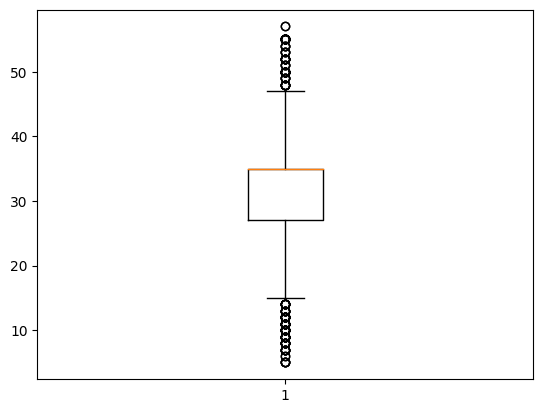

In [ ]:
plt.boxplot(data['ibu'])

In [ ]:
Q1=np.percentile(data['ounces'],25,interpolation='midpoint')
Q2=np.percentile(data['ounces'],50,interpolation='midpoint')
Q3=np.percentile(data['ounces'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

12.0
12.0
16.0


<ipython-input-59-af48aa4dd368>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ounces'],25,interpolation='midpoint')
<ipython-input-59-af48aa4dd368>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ounces'],50,interpolation='midpoint')
<ipython-input-59-af48aa4dd368>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(dat

In [ ]:
IQRo=Q3-Q1
IQRo

4.0

In [ ]:
low_limo=Q1-1.5*IQRo
up_limo=Q3+1.5*IQRo
print(low_limo)
print(up_limo)

6.0
22.0


In [ ]:
outlierw=[]
for x in data['ounces']:
  if ((x>up_limo)or(x<low_limo)):
    outlierw.append(x)

In [ ]:
outlierw

[24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 32.0,
 32.0,
 24.0,
 24.0,
 32.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0]

In [ ]:
ind11=data['ounces']<low_limo
data.loc[ind11].index

Int64Index([], dtype='int64')

In [ ]:
ind22=data['ounces']>up_limo
data.loc[ind22].index

Int64Index([ 477,  581,  957, 1181, 1341, 1342, 1343, 1344, 1345, 1346, 1347,
            1348, 1361, 1370, 1374, 1376, 1382, 1383, 1554, 1895, 1896, 2097,
            2099, 2100],
           dtype='int64')

In [ ]:
data.drop([477,  581,  957, 1181, 1341, 1342, 1343, 1344, 1345, 1346, 1347,
            1348, 1361, 1370, 1374, 1376, 1382, 1383, 1554, 1895, 1896, 2097,
            2099, 2100],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b74b3f580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b74b3ebf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b74b3f820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b74b3f370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b74b3d2d0>],
 'means': []}

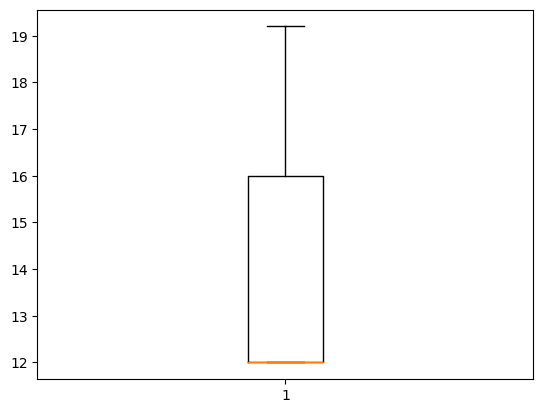

In [ ]:
plt.boxplot(data['ounces'])

<BarContainer object of 1962 artists>

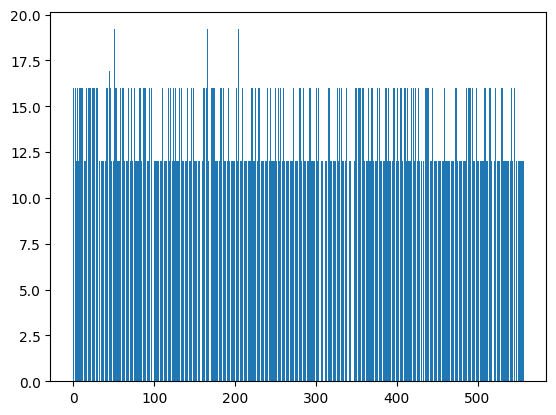

In [ ]:
plt.bar(data['brewery_id'],data['ounces'])

<BarContainer object of 1962 artists>

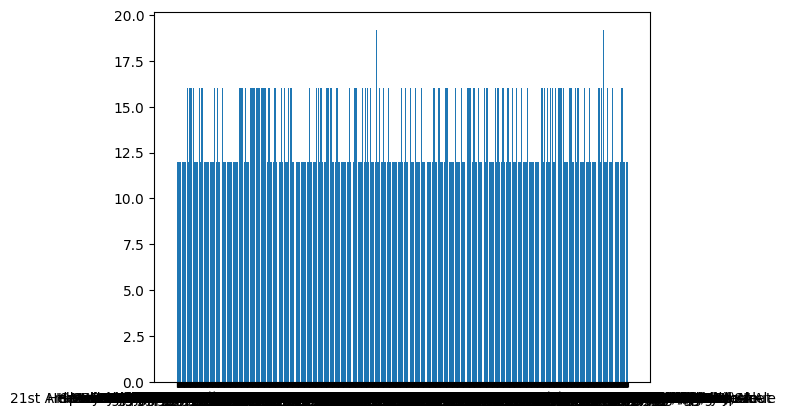

In [ ]:
plt.bar(data['name'],data['ounces'])

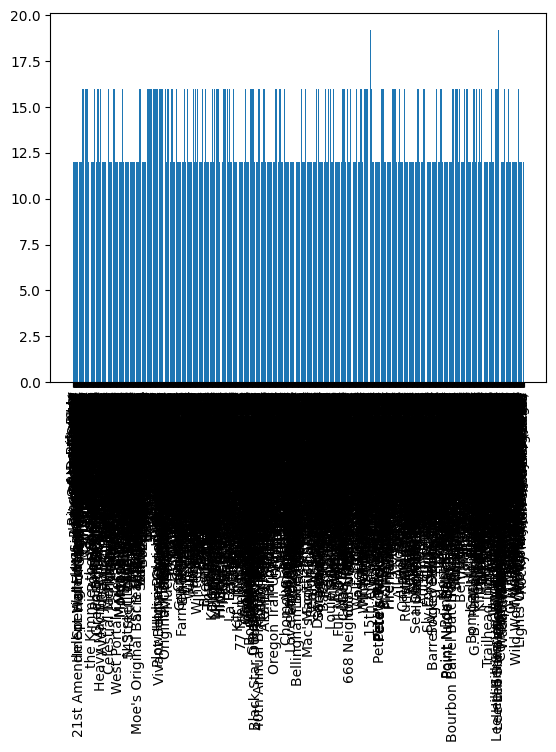

In [ ]:
plt.bar(data['name'],data['ounces'])
plt.xticks(rotation=90)
plt.show()